## Milk Quality Prediction

Pada tahap ini bertujuan untuk memahami masalah dari kualitas susu dengan merancang model prediksi berdasarkan data grade susu.

LINK KAGGLE : https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

## DATASET
pH : nilai pH dari susu segar normalnya berkisar antara 6.4 hingga 9,5, bergantung pada sumber dari susu tersebut.

Temperature : Idealnya, susu disimpan di dalam kulkas pada suhu 40 derajat Fahrenheit atau dibawahnya. Menyimpan susu pada suhu tersebut dapat memperpanjang masa simpan dan memaksimalkan rasa.

Taste

Odor : Susu yang berkualiatas baik memiliki rasa manis yang segar tanpa ada perbedaan rasa setelahnya.

Fat: Jenis jenis susu bervariasi berdasarkan kadar lemak yang terdapat di dalamnya, seperti whole milk (3.25% milk fat), reduced-fat milk (2%), low-fat milk(1%) dan fat-free milk. Informasi itu biasanya tercetak pada kemasan.

Turbidity : Kekeruhan pada susu dipengaruhi oleh kadar lemak yang terkandung dalam susu.

Color

Grade: Kolom ini mendefinisikan Grade (Target) susu yang merupakan data kategori Dimana Rendah (Buruk) atau Sedang (Sedang) Tinggi

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [6]:
df = pd.read_csv('milknew.csv')

In [7]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [9]:
df['Grade']=df['Grade'].map({'low':0,'medium':1,'high':2})
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [10]:
df.isna().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

<Axes: >

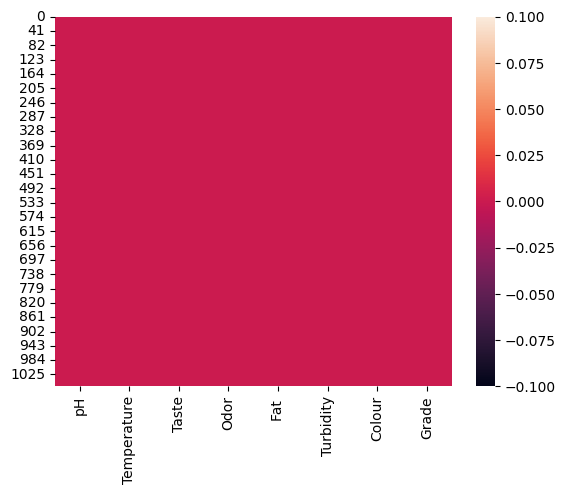

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


<Axes: >

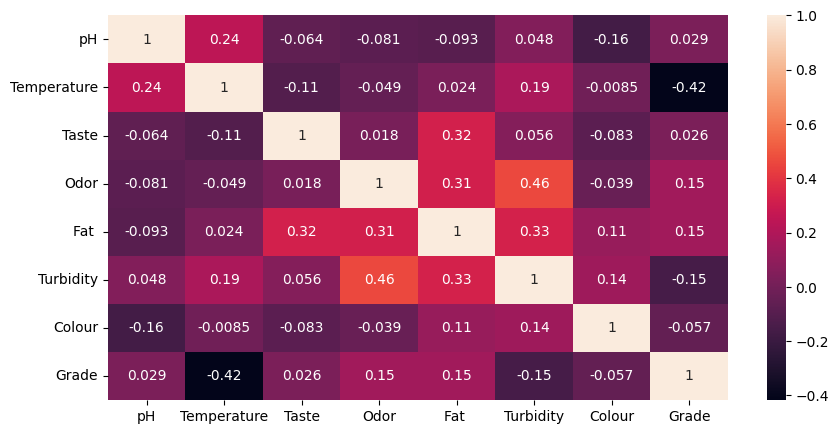

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)


In [14]:
x=df.drop("Grade", axis=1)
y=df["Grade"]

In [15]:
print(x)

       pH  Temperature  Taste  Odor  Fat   Turbidity  Colour
0     6.6           35      1     0     1          0     254
1     6.6           36      0     1     0          1     253
2     8.5           70      1     1     1          1     246
3     9.5           34      1     1     0          1     255
4     6.6           37      0     0     0          0     255
...   ...          ...    ...   ...   ...        ...     ...
1054  6.7           45      1     1     0          0     247
1055  6.7           38      1     0     1          0     255
1056  3.0           40      1     1     1          1     255
1057  6.8           43      1     0     1          0     250
1058  8.6           55      0     1     1          1     255

[1059 rows x 7 columns]


In [16]:
print(y)

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=60)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(1059, 7) (847, 7) (212, 7)


In [19]:
model = LogisticRegression()

In [17]:
from sklearn import svm

model2 = svm.SVC(kernel='linear')
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
model.fit(x_train, y_train)

c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model

In [21]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score (x_train_prediction, y_train)

In [ ]:
print('Akurasi Data Training :', training_data_accuracy)

Akurasi Data Training : 0.7355371900826446


In [23]:
input_data = (6.6,45,0,1,1,1,250)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==2):
    print('Grade Milk High')
else :
    print('Grade Milk Low')

[0]
Grade Milk Low


c:\Users\hp5cd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'milk.sav'
pickle.dump(model, open(filename, 'wb'))